In [57]:
import pandas as pd
import ast
import seaborn as sns
from datasets import load_dataset
import matplotlib.pyplot as plt

dataset = load_dataset('lukebarousse/data_jobs')
sd = dataset['train'].to_pandas()

sd['job_posted_date'] = pd.to_datetime(sd['job_posted_date'])
sd['job_skills'] = sd['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

Using the latest cached version of the dataset since lukebarousse/data_jobs couldn't be found on the Hugging Face Hub
Found the latest cached dataset configuration 'default' at /Users/sheshikanthreddy/.cache/huggingface/datasets/lukebarousse___data_jobs/default/0.0.0/1d815e9ce232eb27db11939c44eb048fe6d2e9ab (last modified on Mon Jan 13 09:19:26 2025).


In [58]:
sd_in = sd[sd['job_country'] == 'India']

In [59]:
sd_skills = sd_in.explode('job_skills')

In [60]:
sd_skills_count = sd_skills.groupby(['job_skills','job_title_short'] ).size()
sd_skills_count = sd_skills_count.reset_index(name='skill_count')
sd_skills_count.sort_values(by='skill_count', ascending=False, inplace= True)

In [61]:
job_titles = sd_skills_count['job_title_short'].unique().tolist()
job_titles =sorted(job_titles[:3])
job_titles

['Data Analyst', 'Data Engineer', 'Data Scientist']

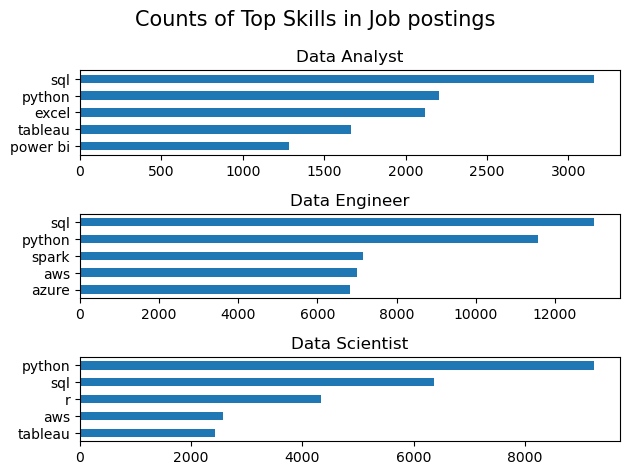

In [62]:
fig, ax = plt.subplots(len(job_titles), 1)

for i,job_title in enumerate(job_titles):
    sd_plot = sd_skills_count[sd_skills_count['job_title_short'] == job_title].head(5)
    sd_plot.plot(kind='barh', x='job_skills', y='skill_count', ax=ax[i], title =job_title)
    ax[i].invert_yaxis()
    ax[i].set_ylabel('')
    ax[i].legend().set_visible(False)
fig.suptitle('Counts of Top Skills in Job postings' ,fontsize=15)
plt.tight_layout()
plt.show()  

In [63]:
sd_job_title_count = sd_in['job_title_short'].value_counts().reset_index(name='jobs_total')

In [64]:
sd_skills_perc =pd.merge(sd_skills_count, sd_job_title_count, how='left', on='job_title_short')
sd_skills_perc['skill_perc'] = 100 * sd_skills_perc['skill_count'] / sd_skills_perc['jobs_total']
sd_skills_perc

,job_skills,job_title_short,skill_count,jobs_total,skill_perc
0,sql,Data Engineer,12993,19062,68.161788
1,python,Data Engineer,11568,19062,60.686182
2,python,Data Scientist,9248,13279,69.643798
3,spark,Data Engineer,7157,19062,37.545903
4,aws,Data Engineer,6993,19062,36.685552
...,...,...,...,...,...
1684,esquisse,Data Scientist,1,13279,0.007531
1685,node.js,Senior Data Analyst,1,1083,0.092336
1686,matlab,Cloud Engineer,1,351,0.284900
1687,fastapi,Cloud Engineer,1,351,0.284900


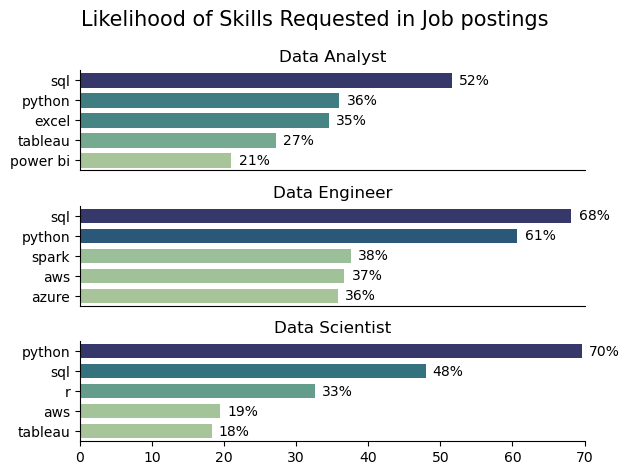

In [97]:
fig, ax = plt.subplots(len(job_titles), 1)

for i,job_title in enumerate(job_titles):
    sd_plot = sd_skills_perc[sd_skills_perc['job_title_short'] == job_title].head(5)
    #sd_plot.plot(kind='barh', x='job_skills', y='skill_perc', ax=ax[i], title =job_title)
    sns.barplot(data= sd_plot, x='skill_perc', y='job_skills', ax=ax[i], hue = 'skill_perc', palette= 'crest', gap=0.1)
    ax[i].set_title(job_title)
    ax[i].set_ylabel('')
    ax[i].set_xlabel('')

    ax[i].legend().set_visible(False)
    ax[i].set_xlim(0,70)
    sns.despine()

    for n, v in enumerate(sd_plot['skill_perc']):
        ax[i].text(v +1 , n , f'{v:.00f}%' , va = 'center')

    if i != len(job_titles)-1:
        ax[i].set_xticks([])

fig.suptitle('Likelihood of Skills Requested in Job postings' ,fontsize=15)
plt.tight_layout()
plt.show()  